In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mh_df = pd.read_csv('MH_cleaned.csv')
gs_df = pd.read_csv('allgreenspace_cleaned.csv')

In [2]:
mh_df.rename(columns={'StateAbbr': 'State', 'PlaceName': 'Cities in Urban Center'}, inplace=True)
mh_df.head()

,State,Cities in Urban Center,PlaceFIPS,Population2010,MHLTH_AdjPrev,MHLTH_Adj95CI,Geolocation
0,AL,Birmingham,107000,212237,15.6,"(15.4, 15.8)","[33.5275663773, -86.7988174678]"
1,AL,Hoover,135896,81619,10.4,"(10.1, 10.7)","[33.3767602729, -86.8051937568]"
2,AL,Huntsville,137000,180105,13.4,"(13.2, 13.7)","[34.6989692671, -86.6387042882]"
3,AL,Mobile,150000,195111,15.0,"(14.9, 15.2)","[30.6776248648, -88.1184482714]"
4,AL,Montgomery,151000,205764,14.8,"(14.6, 15.1)","[32.3472645333, -86.2677059552]"


In [3]:
gs_df.drop(columns=['Unnamed: 0', 'Country'], inplace=True)
mh_df.drop(columns=['Geolocation', 'MHLTH_Adj95CI', 'PlaceFIPS'], inplace=True)

In [4]:
t1 = gs_df[gs_df['Cities in Urban Center'] == 'San Francisco']
t2 = mh_df[mh_df['Cities in Urban Center'] == 'San Francisco']
t2

,State,Cities in Urban Center,Population2010,MHLTH_AdjPrev
112,CA,San Francisco,805235,9.8


In [5]:
df = pd.merge(mh_df, gs_df, on=['Cities in Urban Center', 'State'], how='inner')
df.head()

,State,Cities in Urban Center,Population2010,MHLTH_AdjPrev,UC Grouping,Latitude,Longitude,Urban Center,E_BM_NM_LST,E_SL_LST,...,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,E_EPM2_A15,E_CPM2_T14,SDG_A2G14,SDG_OS15MX,SDG_LUE9015,EX_HW_IDX,Cities in Urban Center_copy
0,AL,Birmingham,212237,15.6,485,33.509025,-86.823651,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,...,121.378798,123.853289,28.649599,0.007314,10.32690,0.773812,74.85,0.661872,20.218000,Birmingham;
1,AL,Huntsville,180105,13.4,501,34.726065,-86.609995,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,...,44.272097,38.116752,6.546265,0.472178,10.86525,0.802599,66.37,0.279665,26.787901,Huntsville
2,AL,Mobile,195111,15.0,422,30.692377,-88.093685,Mobile,Temperate Coniferous Forests,Gleysols,...,44.968004,98.192091,12.988887,0.018721,10.41785,0.822213,63.32,0.750273,9.628220,Mobile
3,AL,Montgomery,205764,14.8,481,32.360134,-86.249187,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,...,51.011226,100.172464,10.836431,0.490166,11.33750,0.747151,75.47,1.659945,14.788300,Montgomery
4,AL,Tuscaloosa,90468,15.5,470,33.199564,-87.553567,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,...,28.221788,17.944370,5.127923,0.163041,11.48650,0.411681,41.24,0.783592,14.610200,Tuscaloosa


In [6]:
df.shape

df.head()

,State,Cities in Urban Center,Population2010,MHLTH_AdjPrev,UC Grouping,Latitude,Longitude,Urban Center,E_BM_NM_LST,E_SL_LST,...,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,E_EPM2_A15,E_CPM2_T14,SDG_A2G14,SDG_OS15MX,SDG_LUE9015,EX_HW_IDX,Cities in Urban Center_copy
0,AL,Birmingham,212237,15.6,485,33.509025,-86.823651,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,...,121.378798,123.853289,28.649599,0.007314,10.32690,0.773812,74.85,0.661872,20.218000,Birmingham;
1,AL,Huntsville,180105,13.4,501,34.726065,-86.609995,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,...,44.272097,38.116752,6.546265,0.472178,10.86525,0.802599,66.37,0.279665,26.787901,Huntsville
2,AL,Mobile,195111,15.0,422,30.692377,-88.093685,Mobile,Temperate Coniferous Forests,Gleysols,...,44.968004,98.192091,12.988887,0.018721,10.41785,0.822213,63.32,0.750273,9.628220,Mobile
3,AL,Montgomery,205764,14.8,481,32.360134,-86.249187,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,...,51.011226,100.172464,10.836431,0.490166,11.33750,0.747151,75.47,1.659945,14.788300,Montgomery
4,AL,Tuscaloosa,90468,15.5,470,33.199564,-87.553567,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,...,28.221788,17.944370,5.127923,0.163041,11.48650,0.411681,41.24,0.783592,14.610200,Tuscaloosa


In [7]:
df.drop(columns=['Cities in Urban Center_copy'], inplace=True)
categorical_df = df.select_dtypes(include=['object', 'category'])

categorical_df.head()

,State,Cities in Urban Center,Urban Center,E_BM_NM_LST,E_SL_LST,DEV_CMI
0,AL,Birmingham,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
1,AL,Huntsville,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
2,AL,Mobile,Mobile,Temperate Coniferous Forests,Gleysols,MDR
3,AL,Montgomery,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
4,AL,Tuscaloosa,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,MDR


In [8]:
non_categorical_df = df.select_dtypes(exclude=['object', 'category'])
non_categorical_df.drop(columns=['UC Grouping'], inplace=True)
non_categorical_df.head()

,Population2010,MHLTH_AdjPrev,Latitude,Longitude,EL_AV_ALS,E_WR_P_14,E_WR_T_14,E_GR_AV14,E_GR_AT14,P15,...,E_EC2O_A15,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,E_EPM2_A15,E_CPM2_T14,SDG_A2G14,SDG_OS15MX,SDG_LUE9015,EX_HW_IDX
0,212237,15.6,33.509025,-86.823651,199.047599,1504.625000,17.497644,0.494568,219.996230,196387.76700,...,0.896003,121.378798,123.853289,28.649599,0.007314,10.32690,0.773812,74.85,0.661872,20.218000
1,180105,13.4,34.726065,-86.609995,202.408832,1575.950073,16.321889,0.521522,88.700999,86467.06209,...,122.942160,44.272097,38.116752,6.546265,0.472178,10.86525,0.802599,66.37,0.279665,26.787901
2,195111,15.0,30.692377,-88.093685,16.670555,1794.200012,20.312027,0.467515,122.669298,118578.67890,...,1.900588,44.968004,98.192091,12.988887,0.018721,10.41785,0.822213,63.32,0.750273,9.628220
3,205764,14.8,32.360134,-86.249187,76.935818,1490.225006,18.804660,0.512807,153.986442,143898.04020,...,18.262692,51.011226,100.172464,10.836431,0.490166,11.33750,0.747151,75.47,1.659945,14.788300
4,90468,15.5,33.199564,-87.553567,64.548497,1438.850037,17.963472,0.439016,44.506974,57182.06445,...,3.562359,28.221788,17.944370,5.127923,0.163041,11.48650,0.411681,41.24,0.783592,14.610200


In [9]:
pearsoncorr = non_categorical_df.corr()['MHLTH_AdjPrev'].drop('MHLTH_AdjPrev')
pearsoncorr.head(10)

Population2010   -0.012063
Latitude          0.033694
Longitude         0.350150
EL_AV_ALS        -0.207836
E_WR_P_14         0.281605
E_WR_T_14        -0.033752
E_GR_AV14         0.227093
E_GR_AT14        -0.191867
P15              -0.172262
B15              -0.182250
Name: MHLTH_AdjPrev, dtype: float64

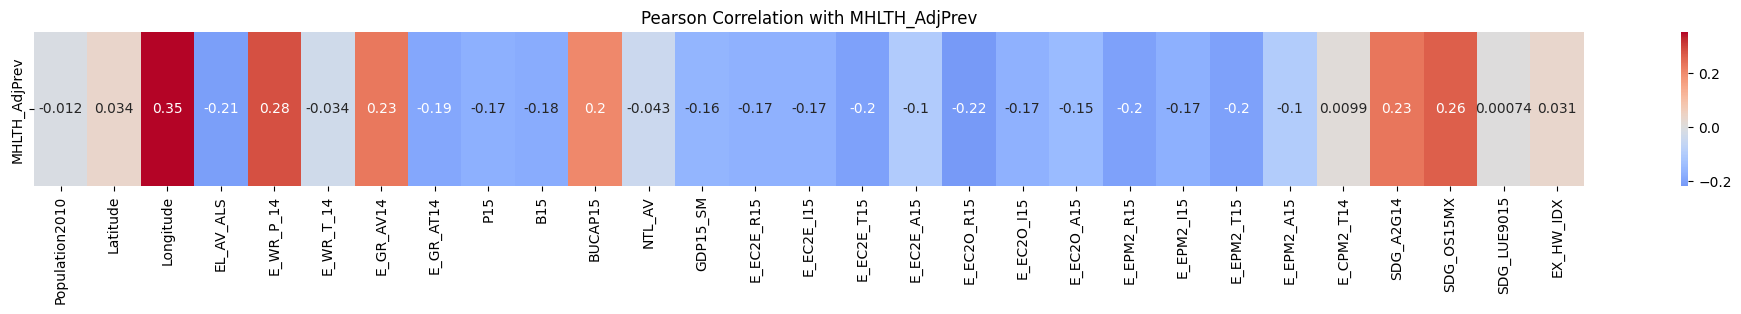

In [10]:
pearcorr = pearsoncorr.to_frame().T

plt.figure(figsize=(25, 2))
sns.heatmap(pearcorr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation with MHLTH_AdjPrev')
plt.show()

In [11]:
spearcorr = non_categorical_df.corr(method='spearman')['MHLTH_AdjPrev'].drop('MHLTH_AdjPrev')
spearcorr.head(10)

Population2010   -0.009483
Latitude          0.050464
Longitude         0.356497
EL_AV_ALS        -0.232869
E_WR_P_14         0.294101
E_WR_T_14        -0.019317
E_GR_AV14         0.260963
E_GR_AT14        -0.167246
P15              -0.184631
B15              -0.168903
Name: MHLTH_AdjPrev, dtype: float64

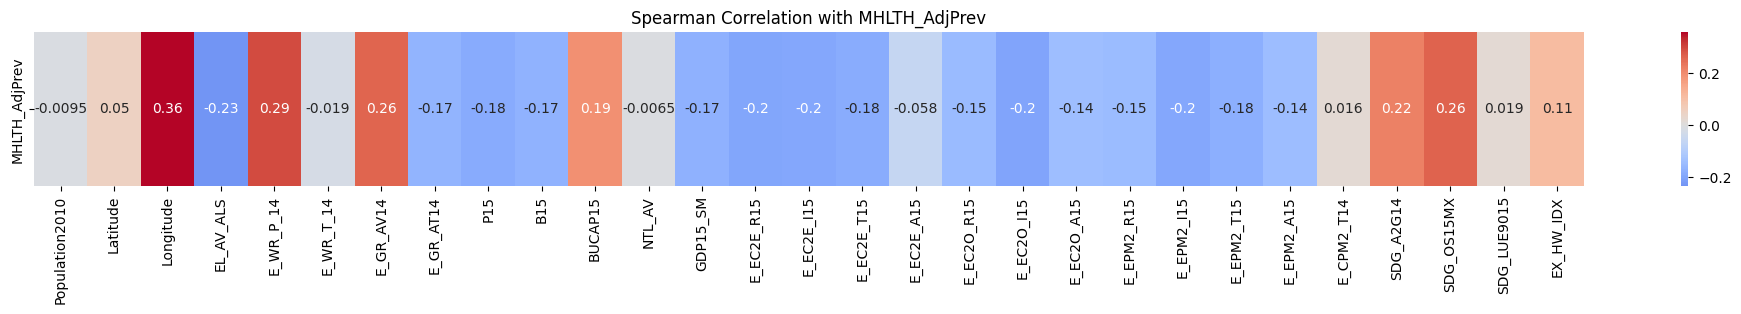

In [12]:
spcorr = spearcorr.to_frame().T

plt.figure(figsize=(25, 2))
sns.heatmap(spcorr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation with MHLTH_AdjPrev')
plt.show()

#average greenness made MH worse, total greenness made MH better

In [13]:
bthreshold = -0.15
tthreshold = 0.1

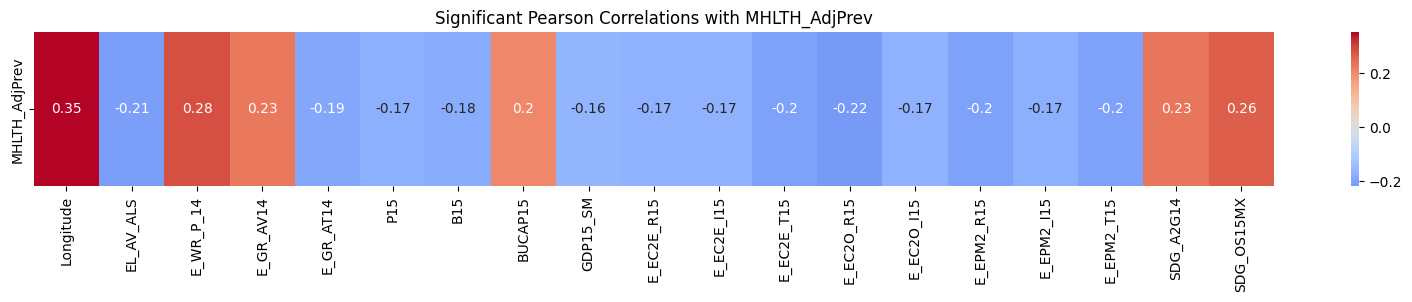

In [14]:
psignicorr = pearsoncorr[(pearsoncorr < bthreshold) | (pearsoncorr > tthreshold)]

psignicorr2 = psignicorr.to_frame().T

if not psignicorr2.empty:
    plt.figure(figsize=(20, 2))
    sns.heatmap(psignicorr2, annot=True, cmap='coolwarm', center=0)
    plt.title('Significant Pearson Correlations with MHLTH_AdjPrev')
    plt.show()
else:
    print("No significant correlations found")


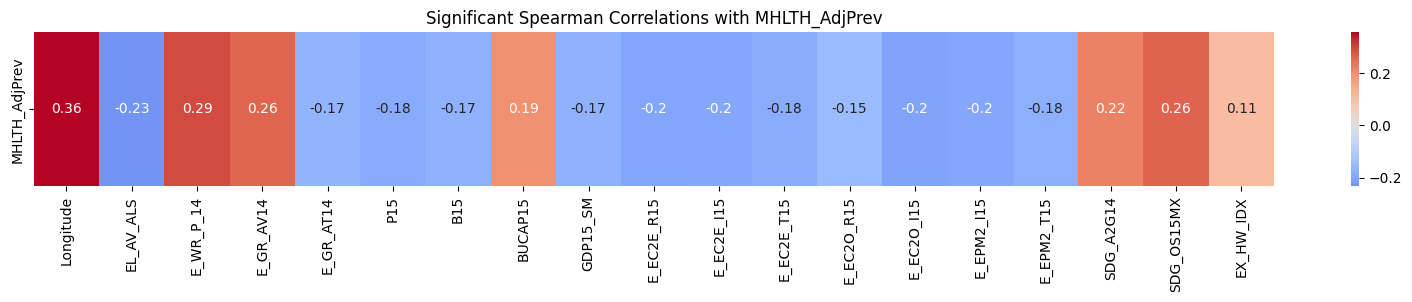

In [15]:
ssignicorr = spearcorr[(spearcorr < bthreshold) | (spearcorr > tthreshold)]

ssignicorr2 = ssignicorr.to_frame().T

if not ssignicorr2.empty:
    plt.figure(figsize=(20, 2))
    sns.heatmap(ssignicorr2, annot=True, cmap='coolwarm', center=0)
    plt.title('Significant Spearman Correlations with MHLTH_AdjPrev')
    plt.show()
else:
    print("No significant correlations found")


In [16]:
# for col in ssignicorr.index:
#     plt.figure(figsize=(4, 3))
#     sns.scatterplot(x=non_categorical_df[col], y=non_categorical_df['MHLTH_AdjPrev'])
#     plt.title(f'Scatter Plot of MHLTH_AdjPrev vs {col}')
#     plt.xlabel(col)
#     plt.ylabel('MHLTH_AdjPrev')
#     plt.show()

#uncomment this, long

In [17]:
#Now let's explore the categorical variables

catcols = categorical_df.columns.tolist()
catcols

['State',
 'Cities in Urban Center',
 'Urban Center',
 'E_BM_NM_LST',
 'E_SL_LST',
 'DEV_CMI']

In [18]:
df[catcols]

,State,Cities in Urban Center,Urban Center,E_BM_NM_LST,E_SL_LST,DEV_CMI
0,AL,Birmingham,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
1,AL,Huntsville,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
2,AL,Mobile,Mobile,Temperate Coniferous Forests,Gleysols,MDR
3,AL,Montgomery,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
4,AL,Tuscaloosa,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,MDR
...,...,...,...,...,...,...
324,WI,Kenosha,Kenosha,"Temperate Grasslands, Savannas, and Shrublands",Luvisols,MDR
325,WI,Madison,Madison,Temperate Broadleaf and Mixed Forests,Luvisols,MDR
326,WI,Milwaukee,Milwaukee,Temperate Broadleaf and Mixed Forests,Luvisols,MDR
327,WI,Racine,Racine,"Temperate Grasslands, Savannas, and Shrublands",Luvisols,MDR


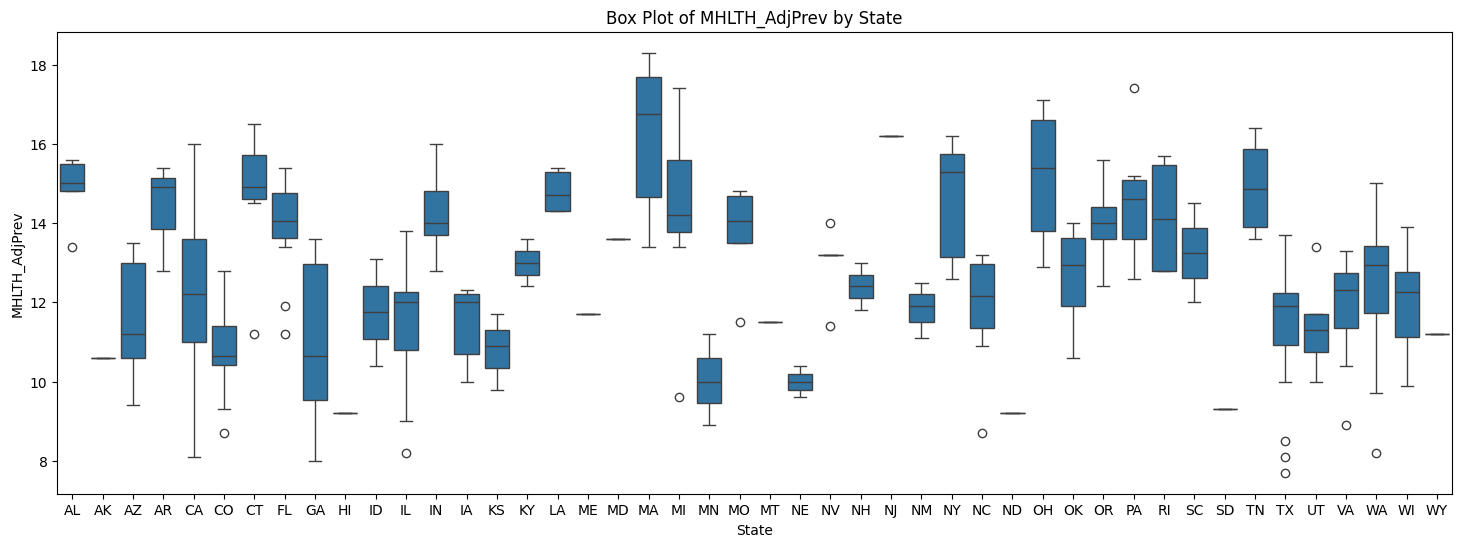

In [19]:
plt.figure(figsize=(18, 6))
#palette = ["#FF6347", "#6495ED", "#32CD32"]
sns.boxplot(x='State', y='MHLTH_AdjPrev', data=df) #palette = custom_palette)
plt.title('Box Plot of MHLTH_AdjPrev by State')
plt.xlabel('State')
plt.ylabel('MHLTH_AdjPrev')
plt.show()

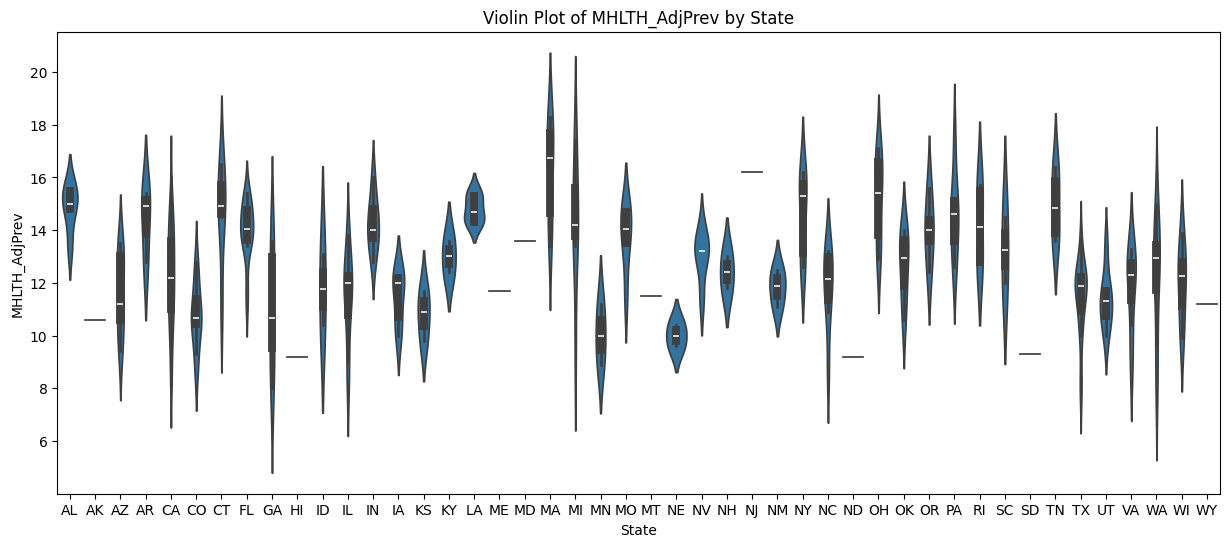

In [20]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='State', y='MHLTH_AdjPrev', data=df)
plt.title('Violin Plot of MHLTH_AdjPrev by State')
plt.xlabel('State')
plt.ylabel('MHLTH_AdjPrev')
plt.show()

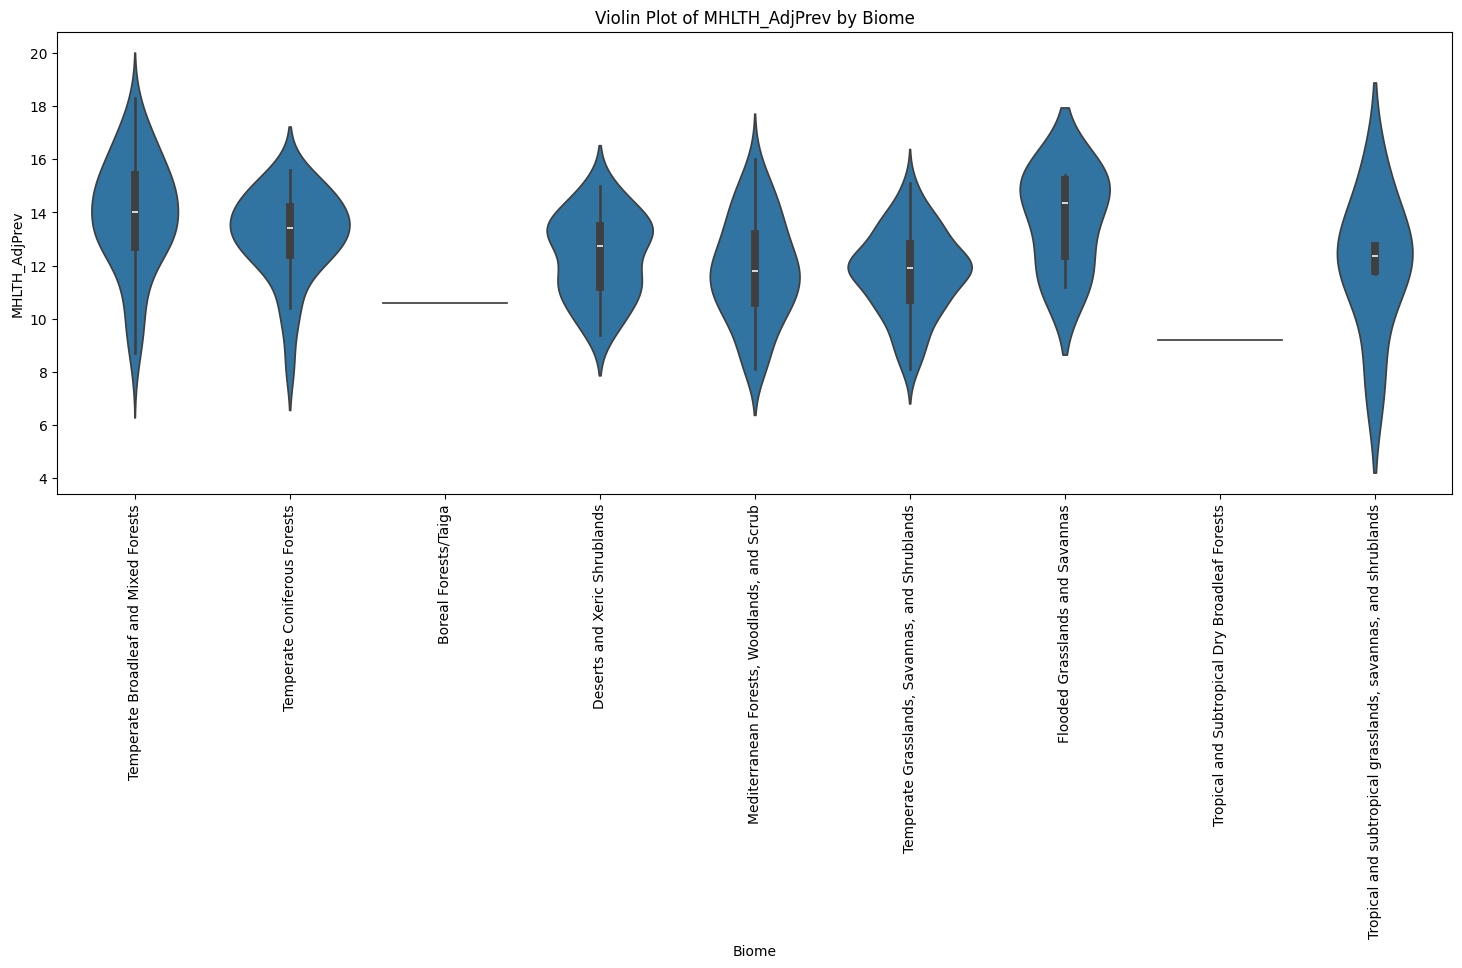

In [43]:
#By biome

plt.figure(figsize=(18, 6))
sns.violinplot(x='E_BM_NM_LST', y='MHLTH_AdjPrev', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of MHLTH_AdjPrev by Biome')
plt.xlabel('Biome')
plt.ylabel('MHLTH_AdjPrev')
plt.show()

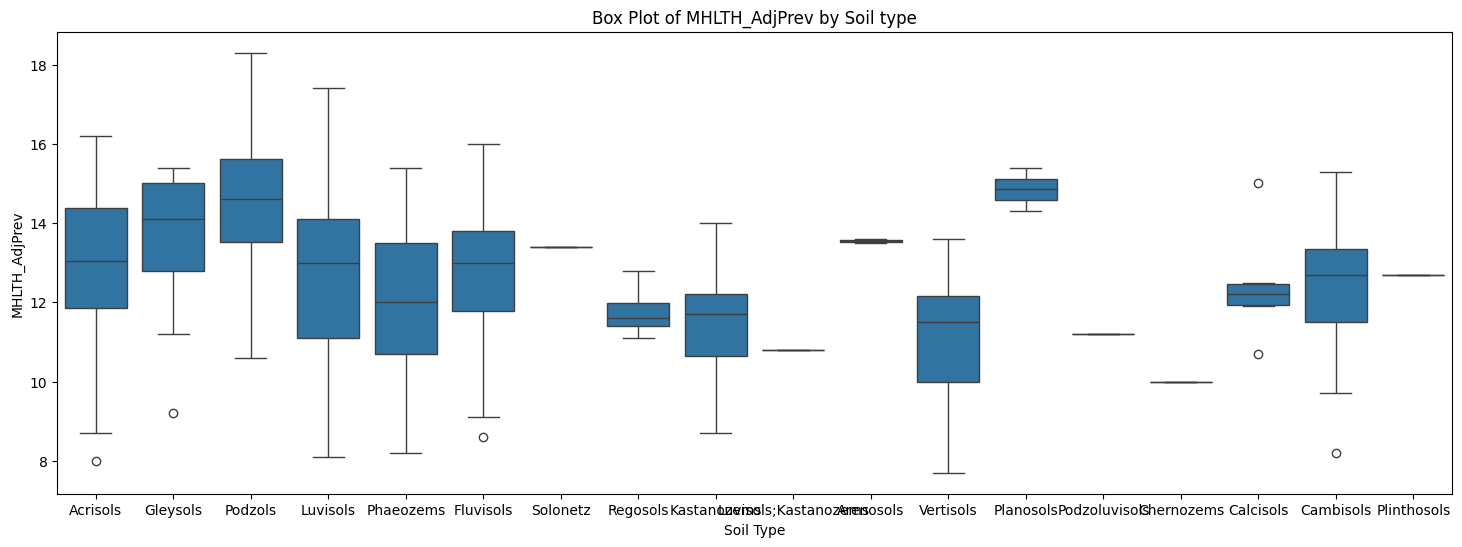

In [22]:
#by soil type

plt.figure(figsize=(18, 6))
sns.boxplot(x='E_SL_LST', y='MHLTH_AdjPrev', data=df)
plt.title('Box Plot of MHLTH_AdjPrev by Soil type')
plt.xlabel('Soil Type')
plt.ylabel('MHLTH_AdjPrev')
plt.show()

In [23]:
#by DEV_CMI

hi = df['DEV_CMI'].unique()
print(hi)

#remove this column

['MDR']


In [24]:
#now need to find most similar city - this can be similar city data (biome, gdp, etc) or similar MH metrics and compare the cities

In [25]:
!pip install scikit-learn

In [26]:
# aggregations = {'Population2010': 'sum'}
# for i in cols:
#     aggregations[i] = 'mean'
# grouped = df.groupby(by='UC Grouping').agg(aggregations)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [28]:
print(ssignicorr.index)

#excluding state, long, lat, biome, city, name
signicols=['EL_AV_ALS', 'E_WR_P_14', 'E_GR_AV14', 'E_GR_AT14', 'P15',
       'B15', 'BUCAP15', 'GDP15_SM', 'E_EC2E_R15', 'E_EC2E_I15', 'E_EC2E_T15',
       'E_EC2O_R15', 'E_EC2O_I15', 'E_EPM2_R15', 'E_EPM2_I15', 'E_EPM2_T15',
       'SDG_A2G14', 'SDG_OS15MX','EX_HW_IDX']

df[signicols].head()

Index(['Longitude', 'EL_AV_ALS', 'E_WR_P_14', 'E_GR_AV14', 'E_GR_AT14', 'P15',
       'B15', 'BUCAP15', 'GDP15_SM', 'E_EC2E_R15', 'E_EC2E_I15', 'E_EC2E_T15',
       'E_EC2O_R15', 'E_EC2O_I15', 'E_EPM2_I15', 'E_EPM2_T15', 'SDG_A2G14',
       'SDG_OS15MX', 'EX_HW_IDX'],
      dtype='object')


,EL_AV_ALS,E_WR_P_14,E_GR_AV14,E_GR_AT14,P15,B15,BUCAP15,GDP15_SM,E_EC2E_R15,E_EC2E_I15,E_EC2E_T15,E_EC2O_R15,E_EC2O_I15,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,SDG_A2G14,SDG_OS15MX,EX_HW_IDX
0,199.047599,1504.625000,0.494568,219.996230,196387.76700,152.894608,778.534274,6.184143e+09,307971.76130,307558.72000,414263.96760,31513.080150,39325.786780,121.378798,123.853289,28.649599,0.773812,74.85,20.218000
1,202.408832,1575.950073,0.521522,88.700999,86467.06209,59.674004,690.135667,2.498489e+09,96696.72377,93099.46980,103947.63910,11605.071570,12128.077950,44.272097,38.116752,6.546265,0.802599,66.37,26.787901
2,16.670555,1794.200012,0.467515,122.669298,118578.67890,71.298004,601.271703,4.072112e+09,112639.31750,363873.52960,148105.81020,11683.943430,14387.101300,44.968004,98.192091,12.988887,0.822213,63.32,9.628220
3,76.935818,1490.225006,0.512807,153.986442,143898.04020,92.235245,640.976379,4.288399e+09,216520.62860,214579.09720,162843.61460,12596.409740,34568.564370,51.011226,100.172464,10.836431,0.747151,75.47,14.788300
4,64.548497,1438.850037,0.439016,44.506974,57182.06445,26.439175,462.368313,1.541527e+09,46325.37719,43862.31518,47296.59377,7513.151775,5707.430338,28.221788,17.944370,5.127923,0.411681,41.24,14.610200


In [29]:
scaler = StandardScaler()
df[signicols] = scaler.fit_transform(df[signicols])

In [30]:
df[signicols].head()

,EL_AV_ALS,E_WR_P_14,E_GR_AV14,E_GR_AT14,P15,B15,BUCAP15,GDP15_SM,E_EC2E_R15,E_EC2E_I15,E_EC2E_T15,E_EC2O_R15,E_EC2O_I15,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,SDG_A2G14,SDG_OS15MX,EX_HW_IDX
0,-0.217022,1.444107,0.630051,-0.531174,-0.513342,-0.506658,2.572688,-0.493539,-0.503637,-0.502457,-0.520097,-0.082622,-0.504371,-0.358327,-0.504946,-0.537896,1.185018,1.164330,1.369509
1,-0.208235,1.596900,0.898203,-0.612381,-0.541603,-0.579392,1.868678,-0.517524,-0.532470,-0.525587,-0.592901,-0.629240,-0.532548,-0.609778,-0.529742,-0.604624,1.277064,0.780316,2.270398
2,-0.693814,2.064434,0.360900,-0.591371,-0.533347,-0.570323,1.160961,-0.507283,-0.530294,-0.496384,-0.582541,-0.627074,-0.530208,-0.607508,-0.512367,-0.585174,1.339779,0.642198,-0.082602
3,-0.536261,1.413260,0.811498,-0.572002,-0.526838,-0.553987,1.477171,-0.505876,-0.516117,-0.512485,-0.579083,-0.602020,-0.509299,-0.587801,-0.511795,-0.591672,1.099772,1.192407,0.624968
4,-0.568646,1.303204,0.077379,-0.639715,-0.549133,-0.605323,0.054729,-0.523752,-0.539344,-0.530898,-0.606192,-0.741592,-0.539200,-0.662119,-0.535576,-0.608906,0.027130,-0.357689,0.600546


In [31]:
#df = df.dropna(subset=signicols)

In [44]:
#calc euclid dist
def eucliddist(uc1, uc2):
    uc1data = df[df['Urban Center'] == uc1]
    uc2data = df[df['Urban Center'] == uc2]
    uc1feats = uc1data[signicols].values.flatten()
    uc2feats = uc2data[signicols].values.flatten()
    print(uc1feats.shape, uc2feats.shape)
    #return np.sqrt(np.sum((uc1feats-uc2feats)**2))

    if uc1feats.shape != uc2feats.shape:
        print(f"shapes mismatch for {uc1} and {uc2}")
        return np.inf
    return np.linalg.norm(uc1feats - uc2feats)

In [45]:
#calc similarity
def calcsimilar(inputuc):
    sims = {}
    for uc in df['Urban Center']:
        if uc != inputuc:
            sim = eucliddist(inputuc, uc)
            sims[uc] = sim
    return sims

In [46]:
#knn closest
def findclosestucs(inputuc, k=1):
    sims = calcsimilar(inputuc)
    sortedsims = sorted(sims.items(), key=lambda x: x[1])
    closestucs = sortedsims[:k]
    return closestucs

In [54]:
testuc = 'Flint'
closestucs = findclosestucs(testuc, k=4)


print(f"The closest ucs to {testuc} are:")
for uc, similarity in closestucs:
    print(f"{uc} (Similarity: {similarity})")

(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (171,)
shapes mismatch for Flint and Phoenix
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (19,)
(19,) (247,)
shapes mismatch for Flint and San Jose
(19,) (437,)
shapes mismatch for Flint and Los Angeles
(19,) (19,)
(19,) (19,)
(19,) (247,)
shapes mismatch for Flint and San Jose
(19,) (19,)
(19,) (114,)
shapes mismatch for Flint and Tijuana
(19,) (38,)
shapes mismatch for Flint and Concord
(19,) (437,)
shapes mismatch for Flint and Los Angeles
(19,) (437,)
shapes mismatch for Flint and Los Angeles
(19

In [41]:
df[df['Urban Center']=='Phoenix']

,State,Cities in Urban Center,Population2010,MHLTH_AdjPrev,UC Grouping,Latitude,Longitude,Urban Center,E_BM_NM_LST,E_SL_LST,...,E_EC2O_A15,E_EPM2_R15,E_EPM2_I15,E_EPM2_T15,E_EPM2_A15,E_CPM2_T14,SDG_A2G14,SDG_OS15MX,SDG_LUE9015,EX_HW_IDX
6,AZ,Chandler,236123,10.2,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
7,AZ,Gilbert,208453,9.7,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
8,AZ,Glendale,226721,13.0,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
9,AZ,Mesa,439041,12.3,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
10,AZ,Peoria,154065,11.0,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
11,AZ,Phoenix,1445632,13.0,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
12,AZ,Scottsdale,217385,9.4,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
13,AZ,Surprise,117517,11.2,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467
14,AZ,Tempe,161719,11.2,78,33.47756,-112.000537,Phoenix,Deserts and Xeric Shrublands,Luvisols,...,1199.268924,0.432846,0.201744,0.18565,5.401133,12.28,-1.234659,-0.988504,0.55149,-0.26467


In [42]:
# grouped.reset_index(drop=True)
# grouped['UC Grouping'] = grouped['UC Grouping'].astype(int)

In [39]:
# grouped

In [13]:
# dfagg = pd.merge(df, df_alpha, on=['UC Grouping'], how='inner')
# dfagg.head()

,Population2010,MHLTH_AdjPrev,UC Grouping,Latitude,Longitude,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14,State,INCM_CMI,DEV_CMI,E_BM_NM_LST,Cities in Urban Center_copy
0,212237,15.6,485,33.509025,-86.823651,0.494568,219.996230,0.773812,74.85,196387.76700,152.894608,778.534274,6.184143e+09,17.497644,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Birmingham;
1,180105,13.4,501,34.726065,-86.609995,0.521522,88.700999,0.802599,66.37,86467.06209,59.674004,690.135667,2.498489e+09,16.321889,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Huntsville
2,195111,15.0,422,30.692377,-88.093685,0.467515,122.669298,0.822213,63.32,118578.67890,71.298004,601.271703,4.072112e+09,20.312027,AL,HIC,MDR,Temperate Coniferous Forests,Mobile
3,205764,14.8,481,32.360134,-86.249187,0.512807,153.986442,0.747151,75.47,143898.04020,92.235245,640.976379,4.288399e+09,18.804660,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Montgomery
4,90468,15.5,470,33.199564,-87.553567,0.439016,44.506974,0.411681,41.24,57182.06445,26.439175,462.368313,1.541527e+09,17.963472,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Tuscaloosa


In [14]:
# # dfagg.drop(columns=['UC Grouping'], inplace=True)

# # Shuting: keepng UC Grouping column and rename it to UC_Grouping
# dfagg.rename(columns={'UC Grouping':'UC_Grouping'}, inplace=True)
# dfagg.to_csv('merged_greenspace_mh.csv')
